# Рассмотрим сделки по 1C, за 2022 год

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [37]:
data=pd.read_excel('2022.xlsx')

In [38]:
data.shape

(6528, 13)

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6528 entries, 0 to 6527
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   КодТО                       6528 non-null   int64  
 1   Контрагент                  6528 non-null   object 
 2   ВидДеятельности             4286 non-null   object 
 3   ИНН                         6488 non-null   object 
 4   СистемаНалогообложения      2459 non-null   object 
 5   КодОКВЭД                    500 non-null    object 
 6   Адрес                       5708 non-null   object 
 7   РегионОбслуживания          6528 non-null   object 
 8   Статус                      6528 non-null   object 
 9   ВыручкаОтПродаж             3035 non-null   float64
 10  СуммаСделки                 6528 non-null   float64
 11  Вид купленной номенклатуры  4364 non-null   object 
 12  Тариф                       6528 non-null   object 
dtypes: float64(2), int64(1), object(1

# Пустые строки:
- СистемаНалогообложения (4069);
- ВыручкаОтПродаж (3493)

# Проведем Анализ по сумме сделок

In [40]:
quantile_15 = data['СуммаСделки'].quantile(0.15)
quantile_20 = data['СуммаСделки'].quantile(0.20)
quantile_25 = data['СуммаСделки'].quantile(0.25)
median=data['СуммаСделки'].median()
quantile_75 = data['СуммаСделки'].quantile(0.75)

In [41]:
print('Квартили распределения суммы сделки')
print()
print(f'У 15% клиентов, у которых была сделка, \nСумма сделки меньше {quantile_15}\nа у 85% больше {quantile_15}')
print()
print()
print(f'У 20% клиентов, у которых была сделка, \nСумма сделки меньше {quantile_20}\nа у 80% больше {quantile_20}')
print()
print()
print(f'У 25% клиентов, у которых была сделка, \nСумма сделки меньше {quantile_25}\nа у 75% больше {quantile_25}')
print()
print()
print(f'У 50% клиентов, у которых была сделка, \nСумма сделки меньше {median}\nа у 50% больше {median}')
print()
print()
print(f'У 75% клиентов, у которых была сделка, \nСумма сделки меньше {quantile_75}\nа у 25% больше {quantile_75}')

Квартили распределения суммы сделки

У 15% клиентов, у которых была сделка, 
Сумма сделки меньше 3450.0
а у 85% больше 3450.0


У 20% клиентов, у которых была сделка, 
Сумма сделки меньше 4140.0
а у 80% больше 4140.0


У 25% клиентов, у которых была сделка, 
Сумма сделки меньше 5175.0
а у 75% больше 5175.0


У 50% клиентов, у которых была сделка, 
Сумма сделки меньше 32400.0
а у 50% больше 32400.0


У 75% клиентов, у которых была сделка, 
Сумма сделки меньше 61862.0
а у 25% больше 61862.0


In [42]:
print(data[data['СуммаСделки']>0]['СуммаСделки'].min(),'Минимальная сумма сделки')
print(data['СуммаСделки'].mean(),'Средняя сумма сделки')
print(data['СуммаСделки'].max(),'Максимальная сумма сделки')
print(data['СуммаСделки'].sum(),'Сумма сделок за 2022 год')

125.0 Минимальная сумма сделки
64715.72999846814 Средняя сумма сделки
25771383.5 Максимальная сумма сделки
422464285.43 Сумма сделок за 2022 год


# Проведем Анализ по системе Налогообложения

In [43]:
# Заменим СистемаНалогообложения пустые значения на не известно 
data['СистемаНалогообложения'].fillna('Не известно', inplace=True)

In [44]:
data_n_cnt=data.groupby('СистемаНалогообложения',as_index=False) \
.aggregate({'КодТО':"count",'СуммаСделки':"sum"}) \
.rename(columns={"КодТО":"Количество сделок"}) \
.sort_values(by='СуммаСделки', ascending=False)

data_n_cnt['% Суммы Сделок']=round(data_n_cnt['СуммаСделки']*100/data_n_cnt['СуммаСделки'].sum(),1)
data_n_cnt['% Количества Сделок']=round(data_n_cnt['Количество сделок']*100/data_n_cnt['Количество сделок'].sum(),1)

data_n_cnt[['СистемаНалогообложения','Количество сделок','% Количества Сделок','СуммаСделки','% Суммы Сделок']]

,СистемаНалогообложения,Количество сделок,% Количества Сделок,СуммаСделки,% Суммы Сделок
4,Не известно,4069,62.3,2.487757e+08,58.9
5,ОСНО,1074,16.5,9.821187e+07,23.2
9,УСНО 6%,788,12.1,3.121543e+07,7.4
1,Бюджет,90,1.4,1.804184e+07,4.3
8,УСНО 15%,262,4.0,1.248653e+07,3.0
6,"ОСНО,УСНО",195,3.0,1.005986e+07,2.4
3,ЕСХН,27,0.4,2.628966e+06,0.6
0,Аутсорсинг,12,0.2,6.158800e+05,0.1
2,ЕНВД,10,0.2,4.246420e+05,0.1
7,Патент,1,0.0,3.540000e+03,0.0


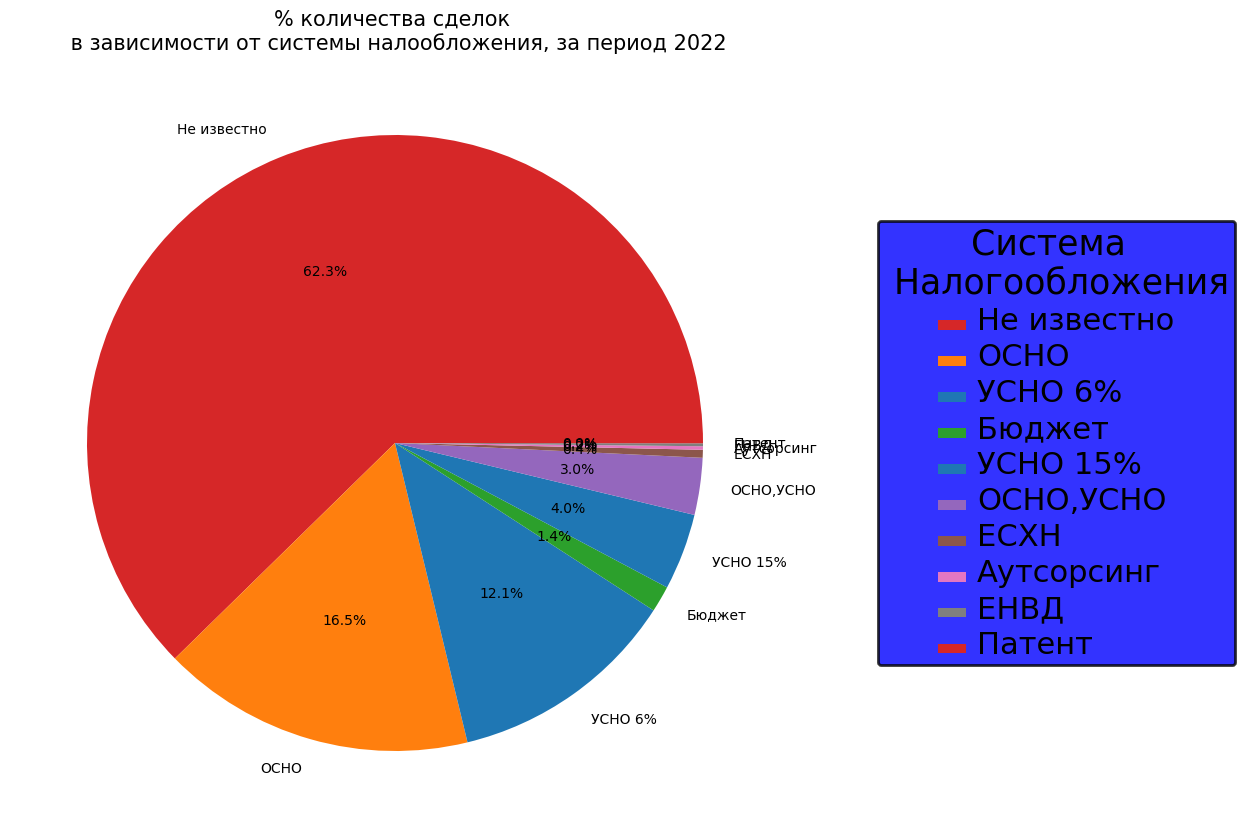

In [45]:
values = data_n_cnt['СистемаНалогообложения']

# Цвета секторов (можно настроить под ваши нужды)
colors = ['tab:red', 'tab:orange', 'tab:blue', 'tab:green', 'tab:blue', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray']

# Создание круговой диаграммы
fig, ax = plt.subplots(figsize=(10, 10))  # Установка размеров фигуры

ax.pie(data_n_cnt['Количество сделок'], labels=values, colors=colors, autopct='%1.1f%%')

legend = ax.legend(labels=values, title="        Система \n Налогообложения", 
                   loc="center right", bbox_to_anchor=(1, 0, 0.5, 1))

legend.get_frame().set_edgecolor('black')  # Цвет рамки легенды
legend.get_frame().set_linewidth(2)  # Толщина линии рамки легенды
legend.get_frame().set_facecolor('Blue')  # Цвет фона легенды
legend.set_bbox_to_anchor((1.6, 0.5))  # Положение легенды

legend.get_title().set_fontsize(25)  # Размер заголовка легенды
for text in legend.get_texts():
    text.set_fontsize(22)  # Размер текста в легенде

plt.title("% количества сделок \n в зависимости от системы налообложения, за период 2022", fontsize=15)

plt.show()

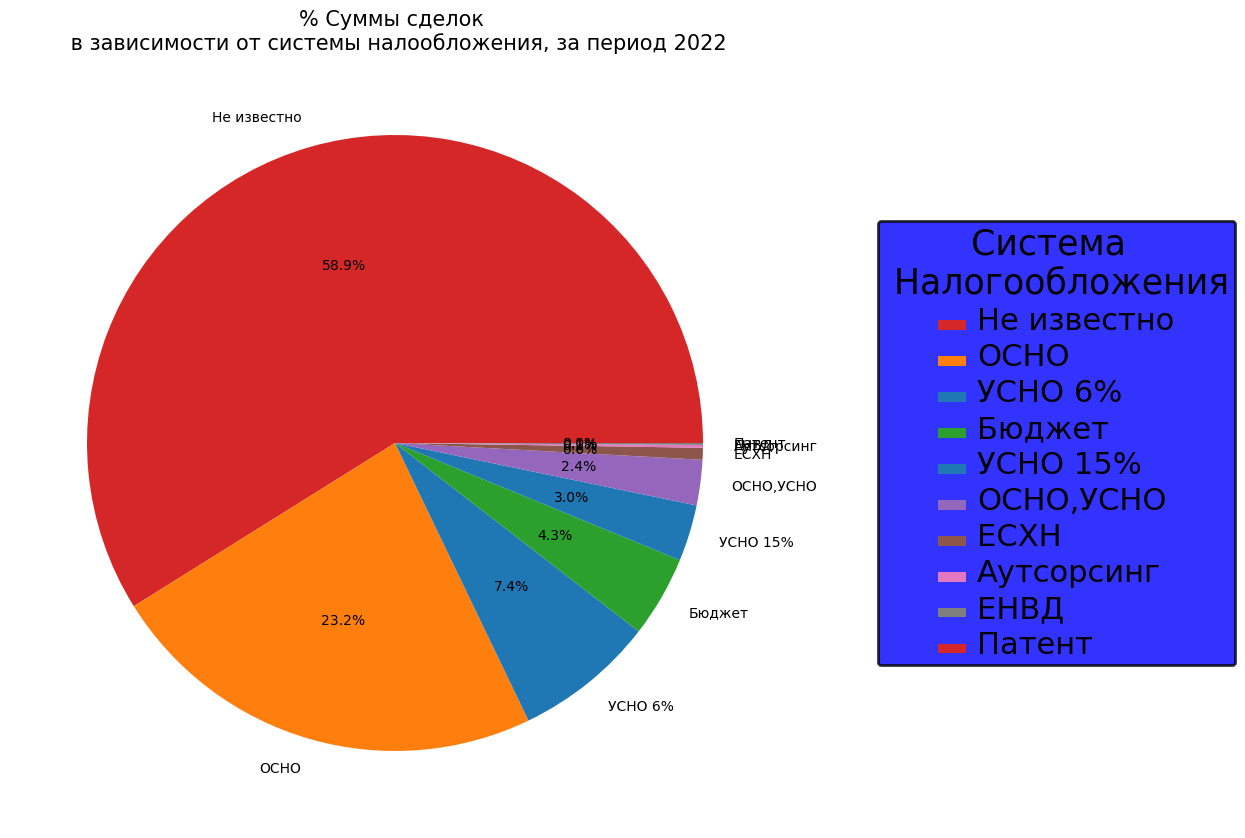

In [46]:
values = data_n_cnt['СистемаНалогообложения']

# Цвета секторов (можно настроить под ваши нужды)
colors = ['tab:red', 'tab:orange', 'tab:blue', 'tab:green', 'tab:blue', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray']

# Создание круговой диаграммы
fig, ax = plt.subplots(figsize=(10, 10))  # Установка размеров фигуры

ax.pie(data_n_cnt['СуммаСделки'], labels=values, colors=colors, autopct='%1.1f%%')

legend = ax.legend(labels=values, title="        Система \n Налогообложения", 
                   loc="center right", bbox_to_anchor=(1, 0, 0.5, 1))

legend.get_frame().set_edgecolor('black')  # Цвет рамки легенды
legend.get_frame().set_linewidth(2)  # Толщина линии рамки легенды
legend.get_frame().set_facecolor('Blue')  # Цвет фона легенды
legend.set_bbox_to_anchor((1.6, 0.5))  # Положение легенды

legend.get_title().set_fontsize(25)  # Размер заголовка легенды
for text in legend.get_texts():
    text.set_fontsize(22)  # Размер текста в легенде

plt.title("% Суммы сделок \n в зависимости от системы налообложения, за период 2022", fontsize=15)

plt.show()

# Рассмотрим выручки компаний по 5 системам налогообложения

# Система Налогообложения ОСНО

In [47]:
osno=data.loc[((data['ВыручкаОтПродаж']>=0) & (data['СистемаНалогообложения']=='ОСНО'))] 
quantile_15 = osno['ВыручкаОтПродаж'].quantile(0.15)
quantile_20 = osno['ВыручкаОтПродаж'].quantile(0.20)
quantile_25 = osno['ВыручкаОтПродаж'].quantile(0.25)
median=osno['ВыручкаОтПродаж'].median()
quantile_75 = osno['ВыручкаОтПродаж'].quantile(0.75)

In [48]:
print('Квартили распределения системы налогообложения ОСНО')
print()
print(f'У 15% клиентов, у которых была сделка, \nвыручка меньше {quantile_15}\nа у 85% больше {quantile_15}')
print()
print()
print(f'У 20% клиентов, у которых была сделка, \nвыручка меньше {quantile_20}\nа у 80% больше {quantile_20}')
print()
print()
print(f'У 25% клиентов, у которых была сделка, \nвыручка меньше {quantile_25}\nа у 75% больше {quantile_25}')
print()
print()
print(f'У 50% клиентов, у которых была сделка, \nвыручка меньше {median}\nа у 50% больше {median}')
print()
print()
print(f'У 75% клиентов, у которых была сделка, \nвыручка меньше {quantile_75}\nа у 25% больше {quantile_75}')

Квартили распределения системы налогообложения ОСНО

У 15% клиентов, у которых была сделка, 
выручка меньше 25405750.0
а у 85% больше 25405750.0


У 20% клиентов, у которых была сделка, 
выручка меньше 33845000.0
а у 80% больше 33845000.0


У 25% клиентов, у которых была сделка, 
выручка меньше 42153500.0
а у 75% больше 42153500.0


У 50% клиентов, у которых была сделка, 
выручка меньше 106652000.0
а у 50% больше 106652000.0


У 75% клиентов, у которых была сделка, 
выручка меньше 317586000.0
а у 25% больше 317586000.0


# Система Налогообложения УСНО 6%

In [49]:
usno_6=data.loc[((data['ВыручкаОтПродаж']>=0) & (data['СистемаНалогообложения']=='УСНО 6%'))] 
quantile_15 = usno_6['ВыручкаОтПродаж'].quantile(0.15)
quantile_20 = usno_6['ВыручкаОтПродаж'].quantile(0.20)
quantile_25 = usno_6['ВыручкаОтПродаж'].quantile(0.25)
median=usno_6['ВыручкаОтПродаж'].median()
quantile_75 =usno_6['ВыручкаОтПродаж'].quantile(0.75)

In [50]:
print('Квартили распределения системы налогообложения УСНО 6%')
print()
print(f'У 15% клиентов, у которых была сделка, \nвыручка меньше {quantile_15}\nа у 85% больше {quantile_15}')
print()
print()
print(f'У 20% клиентов, у которых была сделка, \nвыручка меньше {quantile_20}\nа у 80% больше {quantile_20}')
print()
print()
print(f'У 25% клиентов, у которых была сделка, \nвыручка меньше {quantile_25}\nа у 75% больше {quantile_25}')
print()
print()
print(f'У 50% клиентов, у которых была сделка, \nвыручка меньше {median}\nа у 50% больше {median}')
print()
print()
print(f'У 75% клиентов, у которых была сделка, \nвыручка меньше {quantile_75}\nа у 25% больше {quantile_75}')

Квартили распределения системы налогообложения УСНО 6%

У 15% клиентов, у которых была сделка, 
выручка меньше 6342999.999999999
а у 85% больше 6342999.999999999


У 20% клиентов, у которых была сделка, 
выручка меньше 8892800.000000002
а у 80% больше 8892800.000000002


У 25% клиентов, у которых была сделка, 
выручка меньше 13800000.0
а у 75% больше 13800000.0


У 50% клиентов, у которых была сделка, 
выручка меньше 34472000.0
а у 50% больше 34472000.0


У 75% клиентов, у которых была сделка, 
выручка меньше 69894000.0
а у 25% больше 69894000.0


# Система Налогообложения Бюджет

In [51]:
b=data.loc[((data['ВыручкаОтПродаж']>=0) & (data['СистемаНалогообложения']=='Бюджет'))] 
quantile_15 = b['ВыручкаОтПродаж'].quantile(0.15)
quantile_20 = b['ВыручкаОтПродаж'].quantile(0.20)
quantile_25 = b['ВыручкаОтПродаж'].quantile(0.25)
median=b['ВыручкаОтПродаж'].median()
quantile_75 =b['ВыручкаОтПродаж'].quantile(0.75)

In [52]:
print('Квартили распределения системы налогообложения Бюджет')
print()
print(f'У 15% клиентов, у которых была сделка, \nвыручка меньше {quantile_15}\nа у 85% больше {quantile_15}')
print()
print()
print(f'У 20% клиентов, у которых была сделка, \nвыручка меньше {quantile_20}\nа у 80% больше {quantile_20}')
print()
print()
print(f'У 25% клиентов, у которых была сделка, \nвыручка меньше {quantile_25}\nа у 75% больше {quantile_25}')
print()
print()
print(f'У 50% клиентов, у которых была сделка, \nвыручка меньше {median}\nа у 50% больше {median}')
print()
print()
print(f'У 75% клиентов, у которых была сделка, \nвыручка меньше {quantile_75}\nа у 25% больше {quantile_75}')

Квартили распределения системы налогообложения Бюджет

У 15% клиентов, у которых была сделка, 
выручка меньше 8316899.999999999
а у 85% больше 8316899.999999999


У 20% клиентов, у которых была сделка, 
выручка меньше 9524400.0
а у 80% больше 9524400.0


У 25% клиентов, у которых была сделка, 
выручка меньше 9949500.0
а у 75% больше 9949500.0


У 50% клиентов, у которых была сделка, 
выручка меньше 29411000.0
а у 50% больше 29411000.0


У 75% клиентов, у которых была сделка, 
выручка меньше 345586500.0
а у 25% больше 345586500.0


# Система Налогообложения УСНО 15%

In [53]:
usno_15=data.loc[((data['ВыручкаОтПродаж']>=0) & (data['СистемаНалогообложения']=='УСНО 15%'))] 
quantile_15 = usno_15['ВыручкаОтПродаж'].quantile(0.15)
quantile_20 = usno_15['ВыручкаОтПродаж'].quantile(0.20)
quantile_25 = usno_15['ВыручкаОтПродаж'].quantile(0.25)
median=usno_15['ВыручкаОтПродаж'].median()
quantile_75 =usno_15['ВыручкаОтПродаж'].quantile(0.75)

In [54]:
print('Квартили распределения системы налогообложения УСНО 15%')
print()
print(f'У 15% клиентов, у которых была сделка, \nвыручка меньше {quantile_15}\nа у 85% больше {quantile_15}')
print()
print()
print(f'У 20% клиентов, у которых была сделка, \nвыручка меньше {quantile_20}\nа у 80% больше {quantile_20}')
print()
print()
print(f'У 25% клиентов, у которых была сделка, \nвыручка меньше {quantile_25}\nа у 75% больше {quantile_25}')
print()
print()
print(f'У 50% клиентов, у которых была сделка, \nвыручка меньше {median}\nа у 50% больше {median}')
print()
print()
print(f'У 75% клиентов, у которых была сделка, \nвыручка меньше {quantile_75}\nа у 25% больше {quantile_75}')

Квартили распределения системы налогообложения УСНО 15%

У 15% клиентов, у которых была сделка, 
выручка меньше 8569350.0
а у 85% больше 8569350.0


У 20% клиентов, у которых была сделка, 
выручка меньше 15443000.0
а у 80% больше 15443000.0


У 25% клиентов, у которых была сделка, 
выручка меньше 21457750.0
а у 75% больше 21457750.0


У 50% клиентов, у которых была сделка, 
выручка меньше 40995000.0
а у 50% больше 40995000.0


У 75% клиентов, у которых была сделка, 
выручка меньше 75998750.0
а у 25% больше 75998750.0


# Система Налогообложения ОСНО,УСНО

In [55]:
osn_usn=data.loc[((data['ВыручкаОтПродаж']>=0) & (data['СистемаНалогообложения']=='ОСНО,УСНО'))] 
quantile_15 = osn_usn['ВыручкаОтПродаж'].quantile(0.15)
quantile_20 = osn_usn['ВыручкаОтПродаж'].quantile(0.20)
quantile_25 = osn_usn['ВыручкаОтПродаж'].quantile(0.25)
median=osn_usn['ВыручкаОтПродаж'].median()
quantile_75 =osn_usn['ВыручкаОтПродаж'].quantile(0.75)

In [56]:
print('Квартили распределения системы налогообложения ОСНО,УСНО')
print()
print(f'У 15% клиентов, у которых была сделка, \nвыручка меньше {quantile_15}\nа у 85% больше {quantile_15}')
print()
print()
print(f'У 20% клиентов, у которых была сделка, \nвыручка меньше {quantile_20}\nа у 80% больше {quantile_20}')
print()
print()
print(f'У 25% клиентов, у которых была сделка, \nвыручка меньше {quantile_25}\nа у 75% больше {quantile_25}')
print()
print()
print(f'У 50% клиентов, у которых была сделка, \nвыручка меньше {median}\nа у 50% больше {median}')
print()
print()
print(f'У 75% клиентов, у которых была сделка, \nвыручка меньше {quantile_75}\nа у 25% больше {quantile_75}')

Квартили распределения системы налогообложения ОСНО,УСНО

У 15% клиентов, у которых была сделка, 
выручка меньше 11750700.0
а у 85% больше 11750700.0


У 20% клиентов, у которых была сделка, 
выручка меньше 21027600.000000004
а у 80% больше 21027600.000000004


У 25% клиентов, у которых была сделка, 
выручка меньше 26366500.0
а у 75% больше 26366500.0


У 50% клиентов, у которых была сделка, 
выручка меньше 66381000.0
а у 50% больше 66381000.0


У 75% клиентов, у которых была сделка, 
выручка меньше 163355500.0
а у 25% больше 163355500.0


# Вывод
- Системы налогообложения в порядке приоритета:
- а) ОСНО выручка компаний от 25 млн;
- b) УСНО 6% выручка компаний от 6 млн;
- c) Бюджет выручка компаний от 8 млн;
- d) УСНО 15% выручка компаний от 8.5 млн;
- e) ОСНО,УСНО выручка компаний от 11 млн;